In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
from numpy import random
import seaborn as sns
import pandas as pd

np.random.seed(123)

### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

Text(0.5, 0, 'Cars in drive thru')

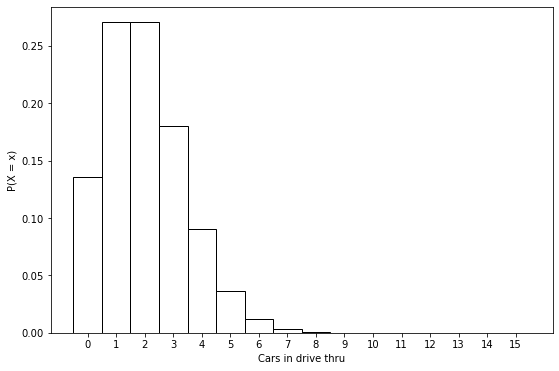

In [26]:
#1
x = range(16)
y = stats.poisson(2).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Cars in drive thru')

## What is the probability that no cars drive up in the noon hour?


In [22]:
one_a = stats.poisson(2).pmf(0)
one_a

0.1353352832366127

## What is the probability that 3 or more cars come through the drive through?


In [60]:
one_b = stats.poisson(2).sf(2)
one_b

0.32332358381693654

## How likely is it that the drive through gets at least 1 car?


In [62]:
one_c = stats.poisson(2).sf(0)
one_c

0.8646647167633873

## Now let's redo this question using a simulation rather than a probability distribution. 



In [42]:
poisson_sample = random.poisson(lam = 2, size = 10_000)

<AxesSubplot:>

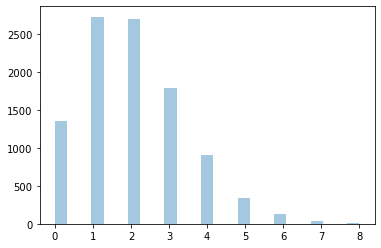

In [48]:

sns.distplot(poisson_sample, kde = False, bins = 25)

In [52]:
cars_at_noon = pd.DataFrame(poisson_sample)
cars_at_noon

,0
0,2
1,4
2,2
3,2
4,2
...,...
9995,2
9996,5
9997,1
9998,2


In [55]:
no_cars = cars_at_noon[0] == 0

In [56]:
no_cars.mean()

0.1353

In [ ]:
#There is a 0.1353 chance that no cars drive up at noon. 

In [57]:
three_or_more_cars = cars_at_noon[0] >= 3

In [58]:
three_or_more_cars.mean()

0.322

In [ ]:
##There is a 0.322 chance that three or more cars drive up at noon. 

In [63]:
at_least_one_car = cars_at_noon[0] > 0

In [64]:
at_least_one_car.mean()

0.8647

In [ ]:
#There is a 0.8647 chance that at least one car will show up at noon. 

In [66]:
#2
μ = 3.0
σ = .3

gpa = stats.norm(μ, σ)
top_5_percent_cutoff = gpa.ppf(.95)
round(top_5_percent_cutoff, 2)

3.49

In [32]:
bottom_15_percent_cutoff = gpa.ppf(.15)
round(bottom_15_percent_cutoff, 2)

2.69

In [35]:
third_decile_upper = gpa.isf(0.7)
third_decile_lower = gpa.isf(0.8)

In [39]:
round(third_decile_lower, 2)

2.75

In [40]:
round(third_decile_upper, 2)

2.84

In [ ]:
## A 2.8 GPA would qualify for this scholarship.

In [51]:
percentile_gpa = round(gpa.cdf(3.5)*100, 2)

In [52]:
percentile_gpa

95.22

In [ ]:
##Now lets solve the 2 again using simulations. 

In [92]:
gpa_sample = random.normal(μ, σ, size = 10_000)

TypeError: type numpy.ndarray doesn't define __round__ method

In [89]:
gpa_df = pd.DataFrame(gpa_sample)
gpa_df

,0
0,2.627709
1,2.906116
2,2.745316
3,3.713386
4,3.197250
...,...
9995,2.715824
9996,2.922417
9997,2.579148
9998,3.313362


In [81]:
gpa_df[0].quantile(0.95)

3.496594388783535

In [82]:
gpa_df[0].quantile(0.15)

2.692302745255947

In [83]:
gpa_df[0].quantile(0.2)

2.7490893009628503

In [84]:
gpa_df[0].quantile(0.3)

2.8429445488108454

In [90]:
gpa_df['Percentile Rank'] = gpa_df[0].rank(pct = True)
gpa_df

,0,Percentile Rank
0,2.627709,0.1051
1,2.906116,0.3764
2,2.745316,0.1998
3,3.713386,0.9903
4,3.197250,0.7419
...,...,...
9995,2.715824,0.1727
9996,2.922417,0.3951
9997,2.579148,0.0769
9998,3.313362,0.8479


In [95]:
gpa_three_five = round(gpa_df[0], 2) == 3.50

In [98]:
gpa_df['Percentile Rank'][gpa_three_five].mean()

0.9509499999999999

In [106]:
clicks = stats.binom(4325, .02)
clicks.sf(96)

0.139266219610741

In [107]:
click_sample = random.binomial(4325, 0.02, size = 100_000)

In [108]:
click_pd = pd.DataFrame(click_sample)
click_pd

,0
0,91
1,91
2,92
3,73
4,91
...,...
99995,90
99996,90
99997,83
99998,100


In [109]:
ninety_seven_or_more = click_pd[0] >= 97
ninety_seven_or_more.mean()

0.13862

In [54]:
homework = stats.binom(60, 0.99)

In [55]:
homework.cdf(59)

0.4528433576092388

In [113]:
homework_sample = random.binomial(60, 0.01, 100_000)

In [114]:
homework_pd = pd.DataFrame(homework_sample)

In [115]:
homework_pd

,0
0,1
1,0
2,2
3,0
4,1
...,...
99995,1
99996,1
99997,0
99998,1


In [116]:
at_least_one = homework_pd[0] > 0
at_least_one.mean()

0.45105

In [5]:
breakroom_one_day = stats.binom(66, .03)

In [80]:
#The probability that at least one student cleans up the breakroom on one day. 
breakroom_one_day.sf(0)

0.8660525464991433

In [15]:
breakroom_two_day = stats.binom(66*2, 0.03)

In [16]:
#Chances the breakroom goes two days without being cleaned up. 
breakroom_two_day.cdf(0)

0.017941920299364183

In [17]:
breakroom_week = stats.binom(66*7, 0.03)

In [18]:
breakroom_week.cdf(0)

7.736441234352279e-07

In [117]:
breakroom_sample = random.binomial(66, .03, 100_000)

In [ ]:
##There is a very small chance, 7.74*10^-7 that the breakroom will go a whole week without someone cleaning it up.

In [19]:
##2x + 10 + 15 = 60 
# 2x + 25 = 60
# 2x = 60 - 25 
# 2x = 35
# x = 35 / 2 
# x = 17.5
# There can be a maximum of 16 customers in line, because it also takes us two minutes to order. 

SyntaxError: invalid syntax (<ipython-input-19-308c8f5d975b>, line 1)

In [22]:
μ = 15.0
σ = 3.0

customers_in_line = stats.norm(μ, σ)

In [68]:
customers_in_line.cdf(16)

0.6305586598182363

In [ ]:
##There is a 0.63 chance we will have enough time to eat our lunch. 

In [27]:
from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

ModuleNotFoundError: No module named 'env'